In [32]:
import torch
from anarx import ANARX, subnet
from utilities import lag_matrix
import matplotlib.pyplot as plt
import numpy as np


In [33]:
model = torch.load("anarxpt2.pt")

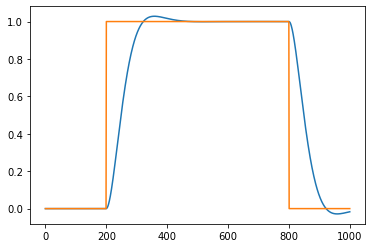

In [34]:
import control
T = 0.01
D = 1.5
sys = control.tf([1], [T**2, D*T, 1])
sys2 = control.tf([1], [1])
time = np.linspace(0, .3, 1000)
u = np.concatenate((np.zeros(200, dtype=np.float64), np.ones(600, dtype=np.float64),np.zeros(200, dtype=np.float64)))
_, yout = control.forced_response(sys, T = time, U = u)
_, uin = control.forced_response(sys2, T = time, U = u )
plt.plot(yout)
plt.plot(uin)

In [35]:
inputs = torch.from_numpy(uin)
outputs = torch.from_numpy(yout)
lagged_inputs = lag_matrix(inputs, 10)


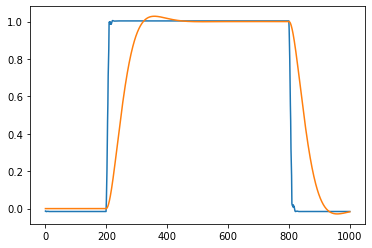

In [36]:

y_hat = torch.zeros_like(inputs)
lags = model.initLags()
# Predict whole Dataset
for i in range(len(inputs)):
    y_hat[i] = model(lagged_inputs[i], lags)
    lags = torch.roll(lags, 1, 0)
    lags[0] = y_hat[i]
plt.plot(y_hat.detach().numpy())
plt.plot(outputs)
plt.show()

In [37]:
# list(model.fc.parameters())[0][0][1]

In [38]:
# w0 = list(model.fc.parameters())[0][0][0]
# w1 = list(model.fc.parameters())[0][0][1]
# w2 = list(model.fc.parameters())[0][0][2]

In [39]:
x = torch.zeros(3).float()
u = torch.from_numpy(u).float()
def nextState(x, u):
    next = torch.zeros(3)
    next[0] = x[1] + model.subnets[0](torch.cat((torch.unsqueeze(u, 0), torch.unsqueeze(x[0], 0))))
    next[1] = x[2] + model.subnets[1](torch.cat((torch.unsqueeze(u, 0), torch.unsqueeze(x[0], 0))))
    next[2] = model.subnets[2](torch.cat((torch.unsqueeze(u, 0), torch.unsqueeze(x[0], 0))))
    return next
y = []
x2 = []
x3 = []
for i in range(1000):
    y.append(x[0].detach().numpy())
    x2.append(x[1].detach().numpy())
    x3.append(x[2].detach().numpy())
    x = nextState(x, u[i])

In [40]:
#y[t

y(t) = N1(y(t-1), u(t-1)) + N2(y(t-2), u(t-2)) + N3(y(t-3), u(t-3))
x1(t) = N2(y(t-1), u(t-1)) + N3(y(t-2), u(t-2))
x2(t) = N3(y(t-1), u(t-1))

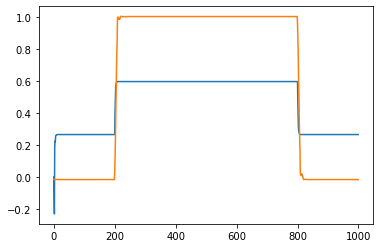

In [41]:
plt.plot(y)

# plt.plot(x2)
# plt.plot(x3)
# plt.plot(outputs)
plt.plot(y_hat.detach().numpy())
plt.show()